# EDA

Este notebook se centra en la exploración de los datasets que se pueden utilizar durante el desarrollo del proyecto

## Referencias

- [SymphonyNet_Dataset](https://symphonynet.github.io/)
- [MidiCaps](https://huggingface.co/datasets/amaai-lab/MidiCaps)

## Symphony Net

El dataset incluye unicamente los archivos midi.

La siguiente información incluye la introducción y análisis proporcionado en la página oficial.

> The first worldwide large-scale symbolic symphonic music dataset.

### Overview

| Total Count (MIDIs) | Total Length | Avg. Length | Avg. Tracks | Time Signature | Keys | Instruments | Total Count (Notes) | Avg. Notes |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 46359 | 3284 Hours | 256 Sec | 20 | 108 | 29 | 128 | 279 million | 6013 |

### Comparación con otros datasets

| Dataset | Scores Count | Notes Count (M) |
| --- | ---: | ---: |
| MAETRO | 1184 | 6 |
| GiantMIDI-Piano | 10854 | 39 |
| MMD | 1524557 | 2075 |
| LMD | 148403 | 535 |
| Symphony MIDI Dataset | 46187 | 279 |

## MidiCaps

El dataset cuenta con los archivos midi, además de una tabla que incluye el path del archivo y un caption como el siguiente "A melodic electronic composition with classical influences, featuring a string ensemble, trumpet, brass section, synth strings, and drums. Set in F# minor with a 4/4 time signature, it moves at an Allegro tempo. The mood evokes a cinematic, spacious, and epic atmosphere while maintaining a sense of relaxation."

**Columnas**

- location - Ruta de los archivos después de descomprimir el archivo .tar.gz
- caption - Texto descriptivo que describe la pieza musical
- genre - Los dos géneros principales detectados
- genre_prob - Puntuaciones de confianza asociadas a los géneros
- mood - Las cinco etiquetas principales de estado/tema detectadas
- mood_prob - Puntuaciones de confianza asociadas al mood
- key - Tonalidad más dominante de la pista
- time_signature - Compás de la pista
- tempo - Tempo de la pista en pulsos por minuto (bpm)
- tempo_word - Tempo expresado en términos clásicos italianos (Adagio, Largo, Presto, etc.) o en términos simplificados (Lento, Rápido, etc.)
- duration - Duración de la pista en segundos
- duration_word - Etiqueta de duración que indica pieza corta/mediana/larga
- chord_summary - Patrón de acordes más frecuente en la pista
- chord_summary_occurence - Número de ocurrencias del patrón de acordes más frecuente
- instrument_summary - Los 5 instrumentos principales por tiempo de reproducción
- instrument_numbers_sorted - Números de instrumento (según la asignación MIDI) presentes en la pista, ordenados por tiempo de reproducción (el más reproducido primero)
- all_chords - Esta columna contiene todos los acordes detectados en la pista
- all_chords_timestamps - Marcas de tiempo correspondientes a los acordes de la columna anterior
- test_set - Se provee una partición opcional train/test 90/10; esta columna indica True (pertenece al conjunto de test) o False (pertenece al conjunto de train)

In [1]:
from datasets import load_dataset

ds = load_dataset("amaai-lab/MidiCaps")

c:\Users\xxraz\OneDrive\Documentos\Desarrollo\maestria\Proyecto\symbolic-music-generation\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['location', 'caption', 'genre', 'genre_prob', 'mood', 'mood_prob', 'key', 'time_signature', 'tempo', 'tempo_word', 'duration', 'duration_word', 'chord_summary', 'chord_summary_occurence', 'instrument_summary', 'instrument_numbers_sorted', 'all_chords', 'all_chords_timestamps', 'test_set'],
        num_rows: 168385
    })
})

## Exploratory Data Analysis - MidiCaps Dataset

Análisis exploratorio de las características del dataset MidiCaps

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Configurar estilo de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# Convertir el dataset a DataFrame
df = pd.DataFrame(ds['train'])
print(f"Dataset shape: {df.shape}")
print(f"\nColumnas disponibles:\n{df.columns.tolist()}")

Dataset shape: (168385, 19)

Columnas disponibles:
['location', 'caption', 'genre', 'genre_prob', 'mood', 'mood_prob', 'key', 'time_signature', 'tempo', 'tempo_word', 'duration', 'duration_word', 'chord_summary', 'chord_summary_occurence', 'instrument_summary', 'instrument_numbers_sorted', 'all_chords', 'all_chords_timestamps', 'test_set']


In [5]:
# Vista general del dataset
df.head()

,location,caption,genre,genre_prob,mood,mood_prob,key,time_signature,tempo,tempo_word,duration,duration_word,chord_summary,chord_summary_occurence,instrument_summary,instrument_numbers_sorted,all_chords,all_chords_timestamps,test_set
0,lmd_full/1/1a0751ad20e2f82957410a7510a1b13e.mid,A melodic electronic composition with classica...,"[electronic, classical]","[0.3596, 0.2367]","[melodic, film, space, epic, relaxing]","[0.1228, 0.1114, 0.0917, 0.0828, 0.079]",F# minor,4/4,135.0,Allegro,59,Short song,"[F#m, A/E, C#]",2,"[String Ensemble, Trumpet, Brass Section, Synt...","[48, 56, 61, 50, 128, 35]","[F#m, A/E, C#, F#m, C#, F#m, C#, D, C#, Bm, F#...","[0.464399092, 5.015510204, 5.758548752, 8.8235...",False
1,lmd_full/1/164fcc530a285bdb8066c6aa8616c95b.mid,A cheerful and melodic Christmas song that ble...,"[classical, pop]","[0.1914, 0.1836]","[christmas, happy, melodic, corporate, adventure]","[0.1763, 0.1688, 0.1643, 0.1282, 0.072]",Eb major,2/4,124.0,Allegro,169,Song,"[Eb, Bb7, Eb, Fm]",5,"[Tango Accordion, Clarinet, Acoustic Guitar, D...","[23, 71, 25, 128, 32]","[Bb7, Eb, Bb7, Eb, Fm, Eb, Bb7, Eb, Bb7, Eb, F...","[0.464399092, 6.780226757, 9.84526077, 13.7462...",False
2,lmd_full/1/16b9a230fb007c0009feee532c3c4686.mid,This energetic electronic and classical compos...,"[electronic, classical]","[0.2148, 0.1806]","[energetic, film, melodic, happy, dark]","[0.1079, 0.1062, 0.0958, 0.0927, 0.0635]",C major,4/4,120.0,Moderate tempo,158,Song,"[C, G, C, C7]",2,[],[],"[C, G, C, C7, Dm, C, G, C, C7, Bbmaj7, C, G7, ...","[0.464399092, 4.086712018, 7.430385487, 8.9164...",False
3,lmd_full/1/17655598958db48a34cd882f81402568.mid,A short electronic ambient song featuring a pi...,"[electronic, ambient]","[0.3031, 0.2369]","[film, energetic, melodic, epic, dark]","[0.1162, 0.1108, 0.105, 0.0863, 0.0824]",E major,4/4,170.0,Presto,99,Short song,"[B, Emaj7, C#m7, B7, A]",5,[Piano],[0],"[B, Emaj7, C#m7, B7, A, B, Emaj7, C#m7, B7, A,...","[0.464399092, 1.30031746, 2.972154195, 3.71519...",False
4,lmd_full/1/13ad61f0cef919bc069175d0b0ce2437.mid,"In this short electronic song, synth strings l...","[electronic, ambient]","[0.4655, 0.2017]","[film, space, relaxing, melodic, dark]","[0.0944, 0.0943, 0.0885, 0.0856, 0.0816]",C minor,4/4,124.0,Fast,103,Short song,"[Gm, Dm, F, C, Bb6]",1,"[Synth Strings, Drums, Electric Bass, Trumpet,...","[51, 128, 34, 56, 52, 115, 61, 25, 55, 16]","[Gm, Dm, F, C, Bb6, C7, Bb, Cm, Bb, Cm7, Bb, G...","[0.464399092, 4.272471655, 5.665668934, 8.2663...",False


In [6]:
# Información general y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168385 entries, 0 to 168384
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   location                   168385 non-null  object 
 1   caption                    168385 non-null  object 
 2   genre                      168385 non-null  object 
 3   genre_prob                 168385 non-null  object 
 4   mood                       168385 non-null  object 
 5   mood_prob                  168385 non-null  object 
 6   key                        168242 non-null  object 
 7   time_signature             168385 non-null  object 
 8   tempo                      167170 non-null  float64
 9   tempo_word                 167170 non-null  object 
 10  duration                   168385 non-null  int64  
 11  duration_word              168385 non-null  object 
 12  chord_summary              168053 non-null  object 
 13  chord_summary_occurence    16

In [7]:
# Estadísticas descriptivas de columnas numéricas
df.describe()

,tempo,duration,chord_summary_occurence
count,167170.000000,168385.000000,168385.000000
mean,116.944075,192.094225,5.179297
std,37.011035,111.811077,4.598217
min,6.000000,3.000000,0.000000
25%,94.000000,122.000000,2.000000
50%,118.000000,192.000000,4.000000
75%,132.000000,248.000000,6.000000
max,960.000000,899.000000,115.000000


In [8]:
# Verificar valores nulos
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print("Valores faltantes por columna:")
print(missing_df[missing_df['Missing Count'] > 0])

Valores faltantes por columna:
               Missing Count  Percentage
tempo_word              1215    0.721561
tempo                   1215    0.721561
chord_summary            332    0.197167
key                      143    0.084924


### Análisis de Caption

Estadísticas de longitud de captions:
       caption_length  caption_word_count
count   168385.000000       168385.000000
mean       330.171969           56.227847
std         65.091377           10.319206
min         90.000000           16.000000
25%        287.000000           49.000000
50%        329.000000           56.000000
75%        372.000000           63.000000
max        644.000000          110.000000


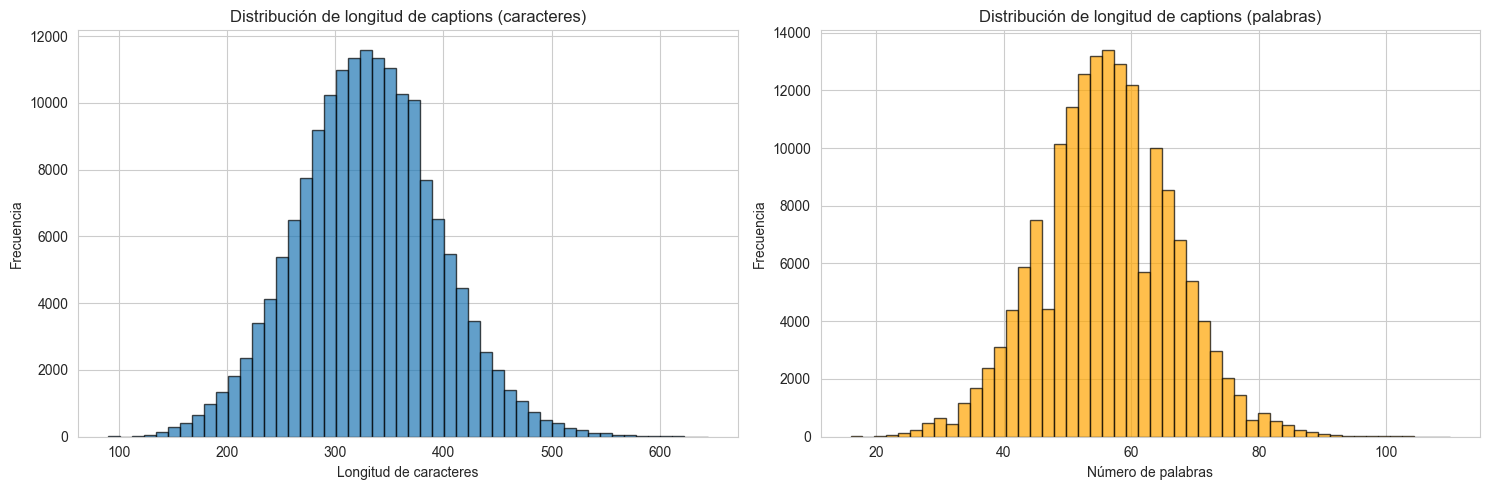

In [9]:
# Análisis de longitud de captions
df['caption_length'] = df['caption'].str.len()
df['caption_word_count'] = df['caption'].str.split().str.len()

print("Estadísticas de longitud de captions:")
print(df[['caption_length', 'caption_word_count']].describe())

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['caption_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Longitud de caracteres')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de longitud de captions (caracteres)')

axes[1].hist(df['caption_word_count'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Número de palabras')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de longitud de captions (palabras)')

plt.tight_layout()
plt.show()

In [10]:
# Ejemplos de captions
print("Ejemplos de captions:")
for i, caption in enumerate(df['caption'].sample(5).values, 1):
    print(f"\n{i}. {caption}")

Ejemplos de captions:

1. A lively rock song with a touch of pop, featuring the energetic interplay of rock organ, overdriven and distorted guitars, electric bass, and drums. Set in the key of D minor and maintaining a moderate tempo of 116 beats per minute, the piece exudes a cheerful and motivational vibe. The 4/4 time signature provides a solid foundation for the melodic exploration that unfolds throughout this engaging composition.

2. A joyful and melodic pop song that evokes feelings of love and Christmas cheer, featuring a lively blend of piano, clean electric guitar, choir vocals, acoustic bass, and acoustic guitar, all set in a brisk 3/4 time signature at a fast tempo of 140 beats per minute, with the key of G major anchoring the harmonies throughout this delightful composition.

3. A classical and electronic blend, this melodic song in C minor evokes a cinematic atmosphere. With a piano at the forefront, it unfolds at a brisk Presto tempo in 4/4 time. The chords Cm, G, and Fd

### Análisis de Genre

In [11]:
# Análisis de géneros
all_genres = []
for genres in df['genre'].dropna():
    if isinstance(genres, list):
        all_genres.extend(genres)
    elif isinstance(genres, str):
        try:
            genre_list = ast.literal_eval(genres)
            all_genres.extend(genre_list)
        except:
            all_genres.append(genres)

genre_counts = Counter(all_genres)
print(f"Total de géneros únicos: {len(genre_counts)}")
print("\nTop 20 géneros más frecuentes:")
for genre, count in genre_counts.most_common(20):
    print(f"{genre}: {count}")

Total de géneros únicos: 42

Top 20 géneros más frecuentes:
electronic: 94482
pop: 92790
classical: 43251
rock: 33755
soundtrack: 31943
ambient: 18152
jazz: 4563
easylistening: 3711
instrumentalpop: 3313
dance: 2949
experimental: 1657
folk: 1615
orchestral: 623
world: 613
techno: 501
alternative: 415
reggae: 396
instrumentalrock: 353
trance: 278
latin: 235


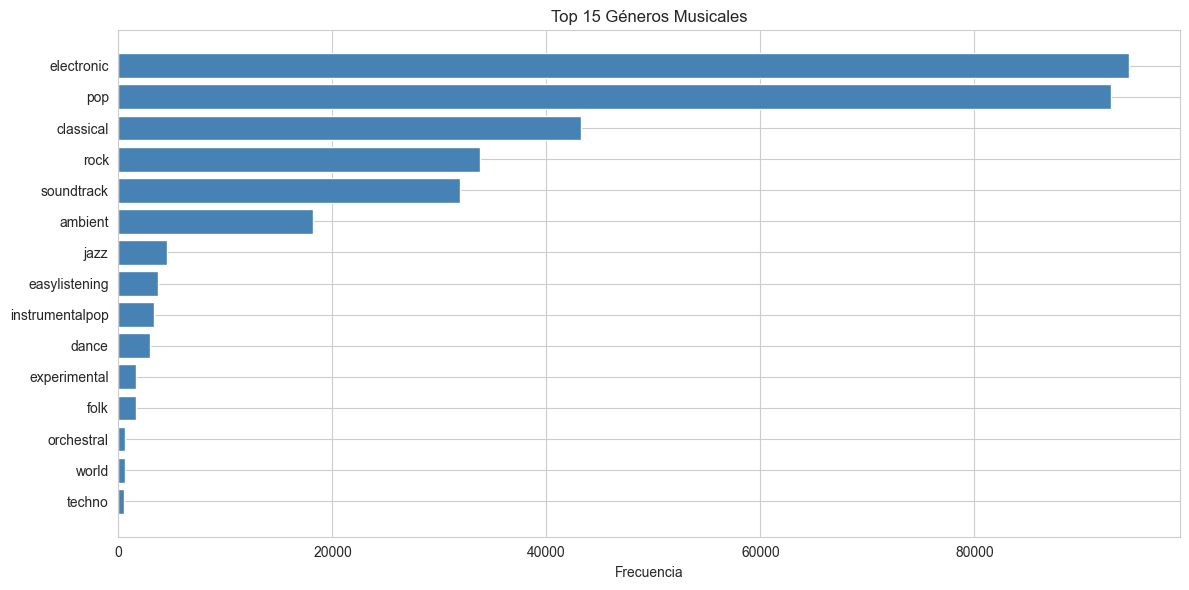

In [12]:
# Visualización de top géneros
top_genres = dict(genre_counts.most_common(15))

plt.figure(figsize=(12, 6))
plt.barh(list(top_genres.keys()), list(top_genres.values()), color='steelblue')
plt.xlabel('Frecuencia')
plt.title('Top 15 Géneros Musicales')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Análisis de Mood

In [13]:
# Análisis de moods
all_moods = []
for moods in df['mood'].dropna():
    if isinstance(moods, list):
        all_moods.extend(moods)
    elif isinstance(moods, str):
        try:
            mood_list = ast.literal_eval(moods)
            all_moods.extend(mood_list)
        except:
            all_moods.append(moods)

mood_counts = Counter(all_moods)
print(f"Total de moods únicos: {len(mood_counts)}")
print("\nTop 20 moods más frecuentes:")
for mood, count in mood_counts.most_common(20):
    print(f"{mood}: {count}")

Total de moods únicos: 48

Top 20 moods más frecuentes:
melodic: 135547
happy: 100213
relaxing: 78220
film: 74429
christmas: 52796
dark: 49431
energetic: 48327
corporate: 37598
love: 35234
meditative: 33966
motivational: 33732
epic: 24742
space: 21484
emotional: 18684
inspiring: 14636
slow: 13279
dream: 10834
action: 10565
background: 6194
positive: 6069


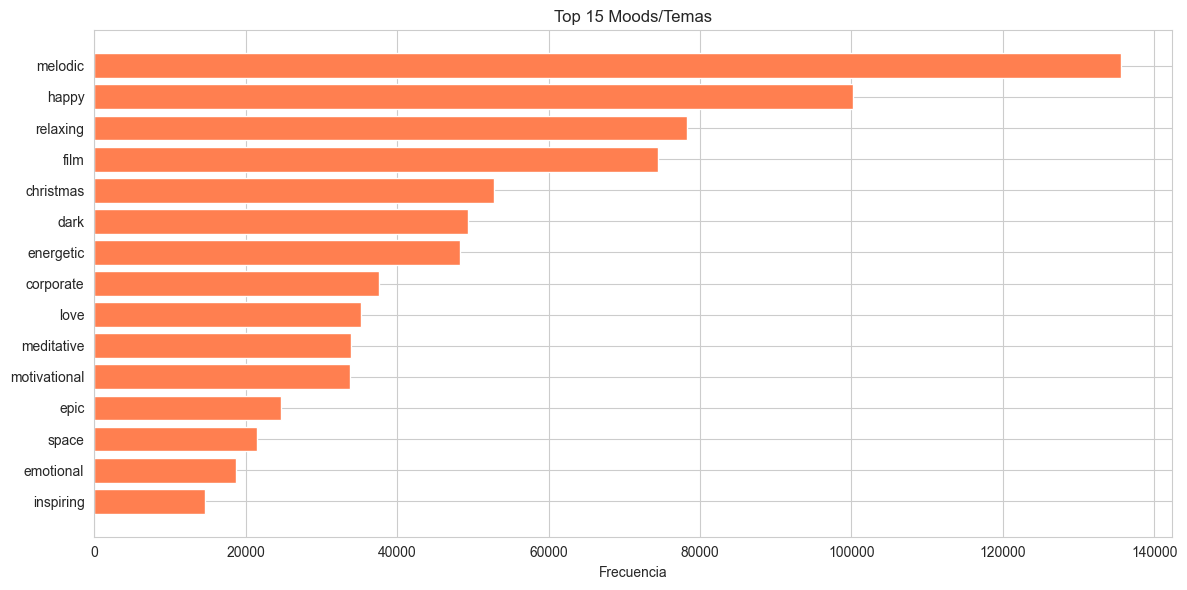

In [14]:
# Visualización de top moods
top_moods = dict(mood_counts.most_common(15))

plt.figure(figsize=(12, 6))
plt.barh(list(top_moods.keys()), list(top_moods.values()), color='coral')
plt.xlabel('Frecuencia')
plt.title('Top 15 Moods/Temas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Análisis de Key (Tonalidad)

Total de tonalidades únicas: 24

Top 15 tonalidades más frecuentes:
key
C major     22013
G major     16523
F major     14668
D major     12616
A minor     10959
A major      9753
D minor      8602
Bb major     8573
E minor      7426
Eb major     7250
E major      6581
C minor      6307
G minor      5981
Ab major     4525
B minor      4009
Name: count, dtype: int64


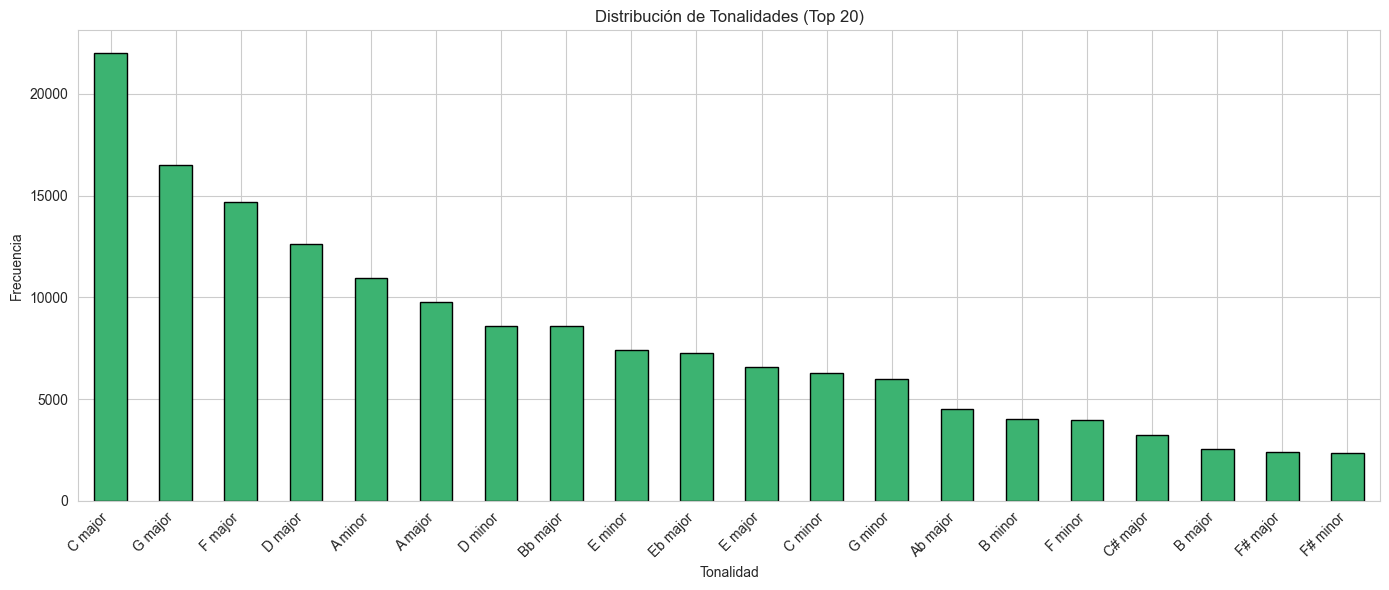

In [15]:
# Distribución de tonalidades
key_counts = df['key'].value_counts()
print(f"Total de tonalidades únicas: {len(key_counts)}")
print("\nTop 15 tonalidades más frecuentes:")
print(key_counts.head(15))

# Visualización
plt.figure(figsize=(14, 6))
key_counts.head(20).plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.xlabel('Tonalidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tonalidades (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Análisis de Time Signature (Compás)

Total de compases únicos: 86

Distribución de compases:
time_signature
4/4     140519
3/4       8589
2/4       6469
1/4       3028
6/8       2961
         ...  
22/8         1
4/1          1
19/8         1
12/2         1
10/2         1
Name: count, Length: 86, dtype: int64


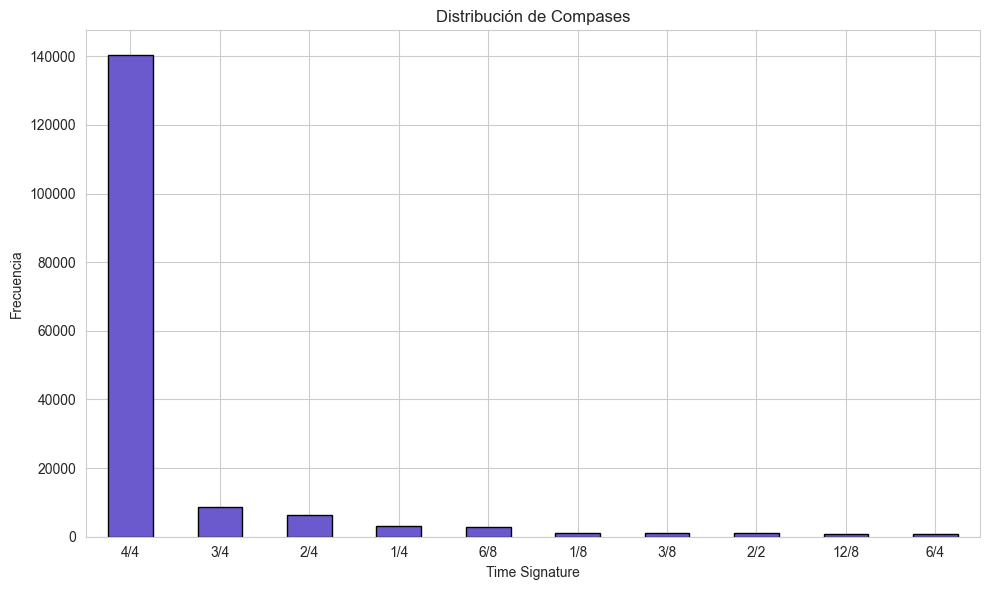

In [16]:
# Distribución de compases
time_sig_counts = df['time_signature'].value_counts()
print(f"Total de compases únicos: {len(time_sig_counts)}")
print("\nDistribución de compases:")
print(time_sig_counts)

# Visualización
plt.figure(figsize=(10, 6))
time_sig_counts.head(10).plot(kind='bar', color='slateblue', edgecolor='black')
plt.xlabel('Time Signature')
plt.ylabel('Frecuencia')
plt.title('Distribución de Compases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Análisis de Tempo

Estadísticas de Tempo (BPM):
count    167170.000000
mean        116.944075
std          37.011035
min           6.000000
25%          94.000000
50%         118.000000
75%         132.000000
max         960.000000
Name: tempo, dtype: float64


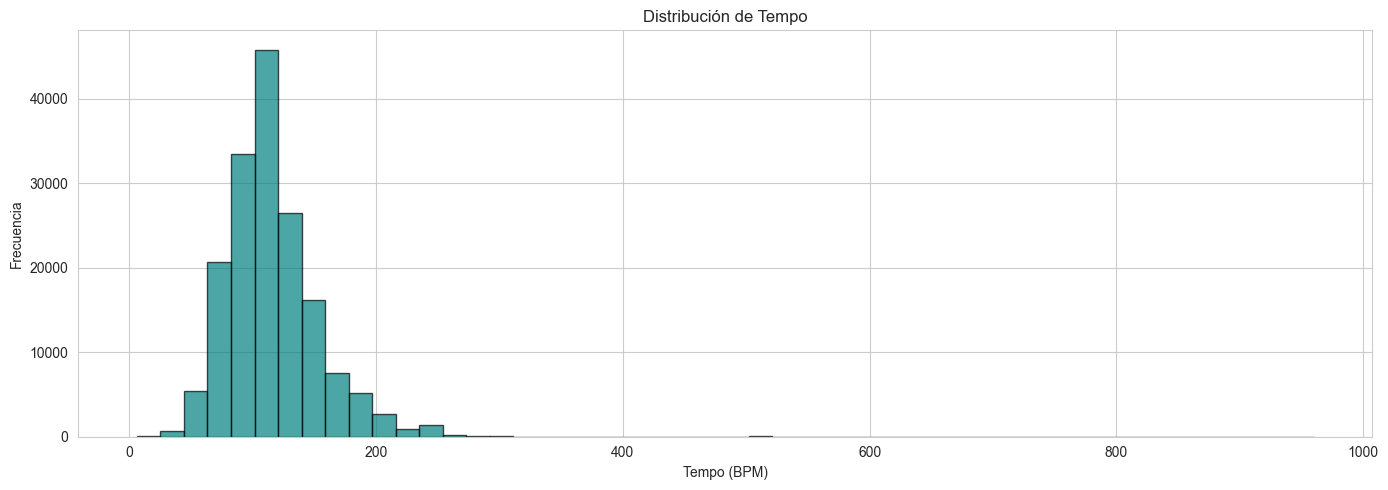

In [17]:
# Estadísticas de tempo (BPM)
print("Estadísticas de Tempo (BPM):")
print(df['tempo'].describe())

# Visualización de distribución de tempo
plt.figure(figsize=(14, 5))

plt.hist(df['tempo'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='teal')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tempo')

plt.tight_layout()
plt.show()


Distribución de Tempo (palabras):
tempo_word
Moderate tempo    40564
Allegro           32316
Fast              22297
Moderato          17353
Andante           12958
Slow              12780
Very fast          7973
Presto             6551
Vivace             6539
Adagio             3820
Largo              2183
Prestissimo        1525
Grave               311
Name: count, dtype: int64


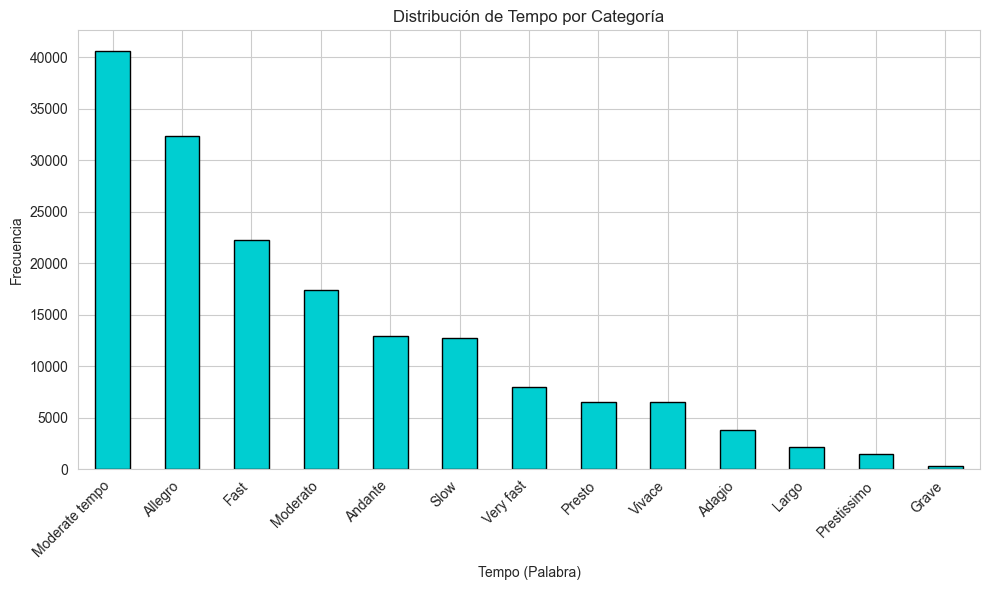

In [18]:
# Análisis de tempo_word
tempo_word_counts = df['tempo_word'].value_counts()
print("\nDistribución de Tempo (palabras):")
print(tempo_word_counts)

# Visualización
plt.figure(figsize=(10, 6))
tempo_word_counts.plot(kind='bar', color='darkturquoise', edgecolor='black')
plt.xlabel('Tempo (Palabra)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tempo por Categoría')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Análisis de Duration (Duración)

Estadísticas de Duración (segundos):
count    168385.000000
mean        192.094225
std         111.811077
min           3.000000
25%         122.000000
50%         192.000000
75%         248.000000
max         899.000000
Name: duration, dtype: float64

Estadísticas de Duración (minutos):
count    168385.000000
mean          3.201570
std           1.863518
min           0.050000
25%           2.033333
50%           3.200000
75%           4.133333
max          14.983333
Name: duration_minutes, dtype: float64


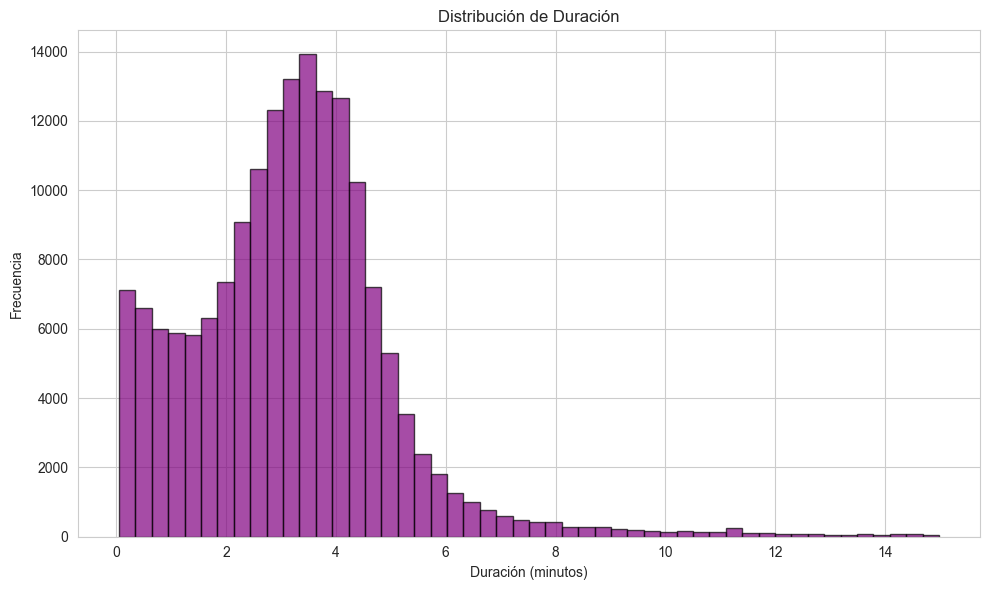

In [19]:
# Estadísticas de duración (segundos)
print("Estadísticas de Duración (segundos):")
print(df['duration'].describe())

# Convertir a minutos para mejor interpretación
df['duration_minutes'] = df['duration'] / 60

print("\nEstadísticas de Duración (minutos):")
print(df['duration_minutes'].describe())

# Visualización
plt.figure(figsize=(10, 6))

plt.hist(df['duration_minutes'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='purple')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Duración')

plt.tight_layout()
plt.show()


Distribución de Duración (categorías):
duration_word
Song              109054
Short song         30755
Long piece         17707
Short fragment     10869
Name: count, dtype: int64


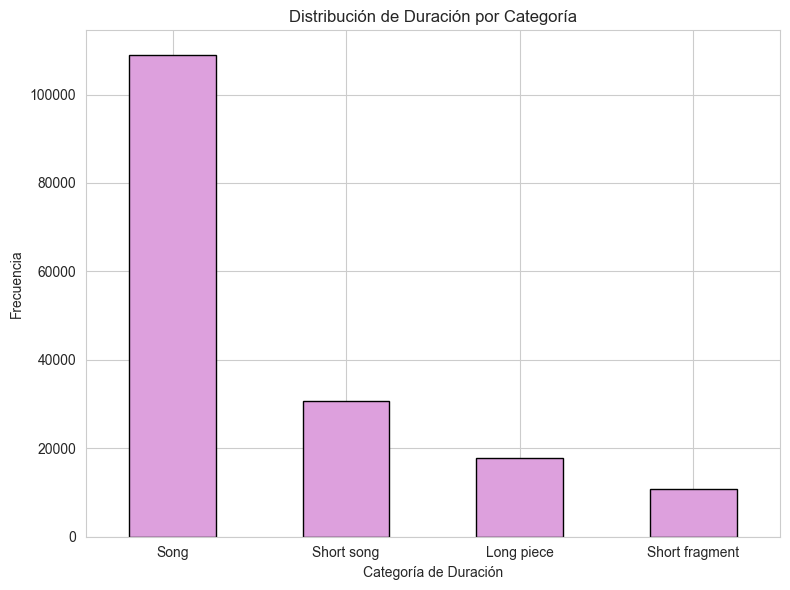

In [20]:
# Análisis de duration_word
duration_word_counts = df['duration_word'].value_counts()
print("\nDistribución de Duración (categorías):")
print(duration_word_counts)

# Visualización
plt.figure(figsize=(8, 6))
duration_word_counts.plot(kind='bar', color='plum', edgecolor='black')
plt.xlabel('Categoría de Duración')
plt.ylabel('Frecuencia')
plt.title('Distribución de Duración por Categoría')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Ejemplo de una muestra del dataset

In [21]:
muestra = df.sample(1).iloc[0]
print("Ejemplo de una muestra del dataset:")
print(f"caption: {muestra['caption']}")
print(f"location: {muestra['location']}")
midi = muestra['location']

Ejemplo de una muestra del dataset:
caption: A slow and emotional classical piece, likely part of a film soundtrack, featuring a woodwind ensemble of flute, clarinet, bassoon, and oboe, accompanied by the warm tones of a French horn. Written in the key of Ab major with a unique 5/4 time signature, this short composition evokes a sense of darkness and epic grandeur.
location: lmd_full/d/d7e0fdc69bb9630ced405c1b37e22f2c.mid


In [26]:
# Leer el archivo MIDI
import pretty_midi
import os

# Construir la ruta completa al archivo MIDI
midi_path = f"../datasets/{midi}"
print(f"Leyendo archivo: {midi_path}")

if not os.path.isfile(midi_path):
    raise FileNotFoundError(f"MIDI file not found: {midi_path}")
print(f"MIDI encontrado: {midi_path}")
# Cargar el archivo MIDI
midi_data = pretty_midi.PrettyMIDI(midi_path)

# Información básica del archivo MIDI
print(f"\nInformación del archivo MIDI:")
print(f"Duración: {midi_data.get_end_time():.2f} segundos")
print(f"Número de instrumentos: {len(midi_data.instruments)}")
print(f"Tempo estimado: {midi_data.estimate_tempo():.2f} BPM")

print(f"\nInstrumentos en el archivo:")
for i, instrument in enumerate(midi_data.instruments):
    print(f"  {i+1}. {instrument.name} (Program: {instrument.program}, Drum: {instrument.is_drum})")
    print(f"     Número de notas: {len(instrument.notes)}")

# Análisis detallado de notas
total_notes = sum(len(inst.notes) for inst in midi_data.instruments)
print(f"\nTotal de notas en el archivo: {total_notes}")

# Rango de pitch (altura de notas)
all_pitches = []
for instrument in midi_data.instruments:
    if not instrument.is_drum:
        for note in instrument.notes:
            all_pitches.append(note.pitch)

if all_pitches:
    print(f"\nRango de pitch:")
    print(f"  Mínimo: {min(all_pitches)} ({pretty_midi.note_number_to_name(min(all_pitches))})")
    print(f"  Máximo: {max(all_pitches)} ({pretty_midi.note_number_to_name(max(all_pitches))})")

# Información de tempo
tempo_changes = midi_data.get_tempo_changes()
print(f"\nCambios de tempo:")
print(f"  Tiempos: {tempo_changes[0]}")
print(f"  BPMs: {tempo_changes[1]}")

Leyendo archivo: ../datasets/lmd_full/d/d7e0fdc69bb9630ced405c1b37e22f2c.mid
MIDI encontrado: ../datasets/lmd_full/d/d7e0fdc69bb9630ced405c1b37e22f2c.mid

Información del archivo MIDI:
Duración: 62.42 segundos
Número de instrumentos: 9
Tempo estimado: 79.33 BPM

Instrumentos en el archivo:
  1. Flutes (Program: 73, Drum: False)
     Número de notas: 57
  2. Hautbois (Program: 68, Drum: False)
     Número de notas: 24
  3. Clarinettes (Program: 71, Drum: False)
     Número de notas: 57
  4. Clarinette basse (Program: 71, Drum: False)
     Número de notas: 10
  5. Bassons (Program: 70, Drum: False)
     Número de notas: 48
  6. Contrebasson (Program: 70, Drum: False)
     Número de notas: 2
  7. Cor (Program: 60, Drum: False)
     Número de notas: 30
  8. Violons 1 (Program: 48, Drum: False)
     Número de notas: 5
  9. Violons 2 (Program: 48, Drum: False)
     Número de notas: 5

Total de notas en el archivo: 238

Rango de pitch:
  Mínimo: 32 (G#1)
  Máximo: 94 (A#6)

Cambios de tempo:


In [27]:
# Reproducir el archivo MIDI
import pygame
import time

# Inicializar pygame mixer
pygame.mixer.init()

# Cargar y reproducir el archivo MIDI
print(f"Reproduciendo: {midi_path}")
pygame.mixer.music.load(midi_path)
pygame.mixer.music.play()

# Esperar mientras se reproduce
print("Reproduciendo... (presiona el botón de stop del kernel para detener)")
while pygame.mixer.music.get_busy():
    time.sleep(1)

print("Reproducción completada")

pygame 2.6.1 (SDL 2.28.4, Python 3.10.17)
Hello from the pygame community. https://www.pygame.org/contribute.html
Reproduciendo: ../datasets/lmd_full/d/d7e0fdc69bb9630ced405c1b37e22f2c.mid
Reproduciendo... (presiona el botón de stop del kernel para detener)
Reproduciendo... (presiona el botón de stop del kernel para detener)


KeyboardInterrupt: 